In [4]:
import fastf1 as ff1

In [5]:
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [6]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('/home/rajaahdjey/Documents/DS_Proj/GitHub/F1 Analysis/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [7]:
# Load the session data
race = ff1.get_session(2022, 'Bahrain','Q')
Q_laps = race.load(telemetry=True)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6', '1']


In [8]:
ver_lap = race.laps.pick_driver('VER').pick_fastest()
ham_lap = race.laps.pick_driver('HAM').pick_fastest()

In [9]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

In [10]:
ver_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-03-19 15:58:45.931,10693,294,7,100,False,12,car,0 days 00:00:00.069000,0 days 01:13:45.002000,5.635000
1,2022-03-19 15:58:46.131,10474,295,8,100,False,12,car,0 days 00:00:00.269000,0 days 01:13:45.202000,22.023889
2,2022-03-19 15:58:46.291,10630,296,8,100,False,12,car,0 days 00:00:00.429000,0 days 01:13:45.362000,35.179444
3,2022-03-19 15:58:46.491,10727,298,8,100,False,12,car,0 days 00:00:00.629000,0 days 01:13:45.562000,51.735000
4,2022-03-19 15:58:46.731,10761,301,8,100,False,12,car,0 days 00:00:00.869000,0 days 01:13:45.802000,71.801667
...,...,...,...,...,...,...,...,...,...,...,...
331,2022-03-19 16:00:15.171,10946,276,7,100,False,12,car,0 days 00:01:29.309000,0 days 01:15:14.242000,5237.537222
332,2022-03-19 16:00:15.411,11187,278,7,100,False,12,car,0 days 00:01:29.549000,0 days 01:15:14.482000,5256.070556
333,2022-03-19 16:00:15.651,11253,283,7,100,False,12,car,0 days 00:01:29.789000,0 days 01:15:14.722000,5274.937222
334,2022-03-19 16:00:16.051,11460,286,7,100,False,12,car,0 days 00:01:30.189000,0 days 01:15:15.122000,5306.715000


In [11]:
import numpy as np
tel['X']
points = np.array([x, y]).T.reshape(-1, 1, 2)

NameError: name 'tel' is not defined

In [12]:
tel

NameError: name 'tel' is not defined

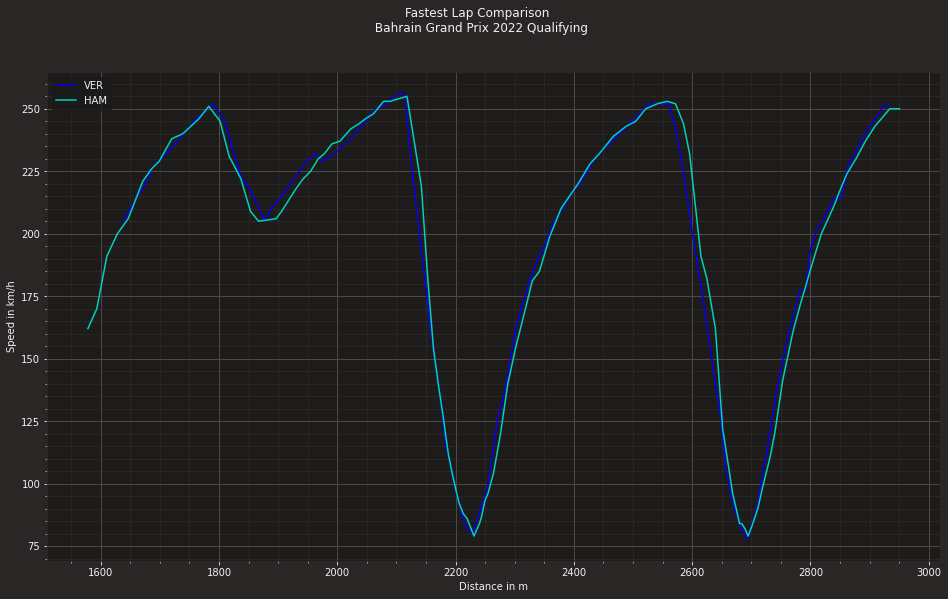

In [13]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(ver_tel['Distance'][100:200], ver_tel['Speed'][100:200], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'][100:200], ham_tel['Speed'][100:200], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{race.event['EventName']} {race.event.year} Qualifying")

plt.show()

In [14]:
tel = lap.get_telemetry()

NameError: name 'lap' is not defined

In [29]:
ver_tel.Brake = ver_tel.Brake.astype("int")
ham_tel.Brake = ham_tel.Brake.astype("int")

In [25]:
import seaborn as sns

<AxesSubplot:>

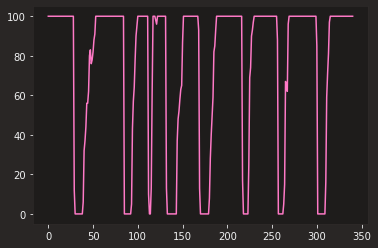

In [120]:
ham_tel.Throttle.plot()

In [105]:
ver_tel.Brake.value_counts()

0    274
1     62
Name: Brake, dtype: int64

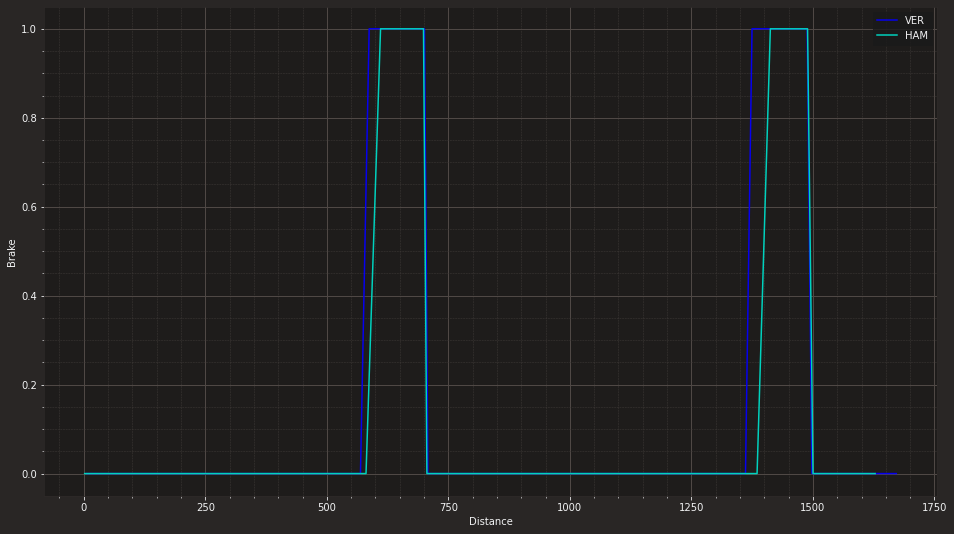

In [118]:
ax1 = sns.set_style(style=None, rc=None )
palette = sns.color_palette("tab10")
fig, ax1 = plt.subplots(figsize=(16,9))
sns.lineplot(x = ver_tel.Distance[0:104],y = ver_tel.Brake[0:104],color=rbr_color,label='VER')
sns.lineplot(x = ham_tel.Distance[0:104],y = ham_tel.Brake[0:104],color=mer_color,label='HAM')
plt.show()


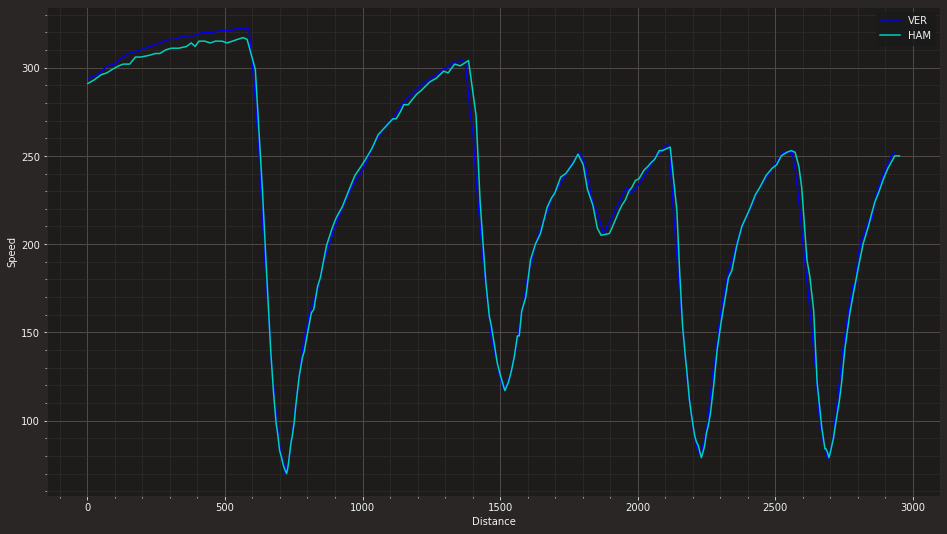

In [121]:
ax1 = sns.set_style(style=None, rc=None )
palette = sns.color_palette("tab10")
fig, ax1 = plt.subplots(figsize=(16,9))
sns.lineplot(x = ver_tel.Distance[0:200],y = ver_tel.Speed,color=rbr_color,label='VER')
sns.lineplot(x = ham_tel.Distance[0:200],y = ham_tel.Speed,color=mer_color,label='HAM')
plt.show()


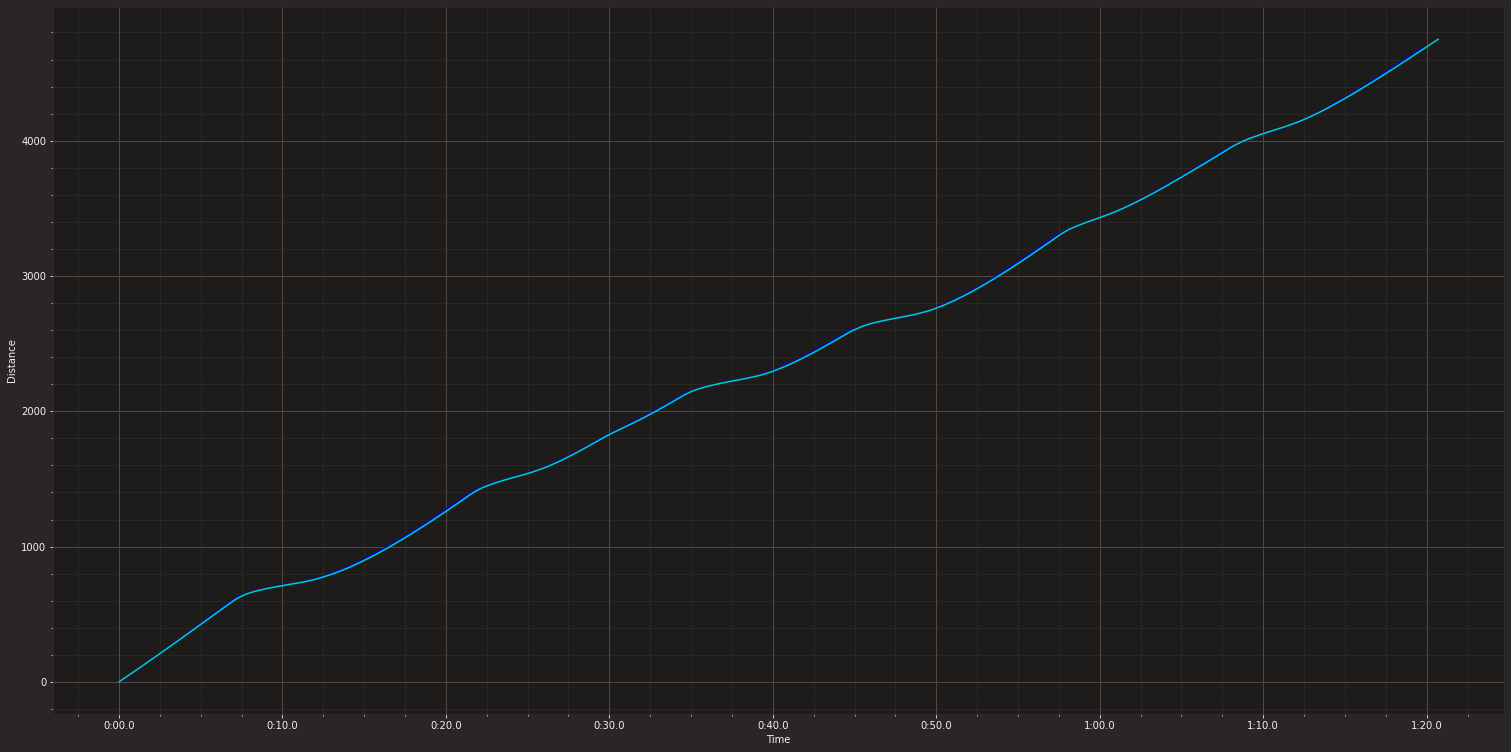

In [116]:
ax1 = sns.set_style(style=None, rc=None )
palette = sns.color_palette("tab10")
fig, ax1 = plt.subplots(figsize=(26,13))
sns.lineplot(data = ver_tel[0:300],x ='Time',y = 'Distance',color=rbr_color,legend='full')
sns.lineplot(data = ham_tel[0:300],x ='Time',y = 'Distance',color=mer_color,legend='full')
plt.show()


<AxesSubplot:>

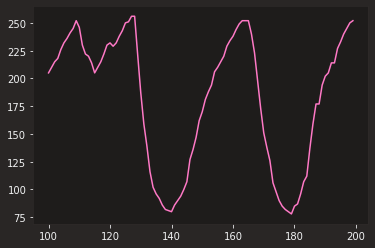

In [108]:
ver_tel.iloc[100:200].Speed.plot()

<AxesSubplot:>

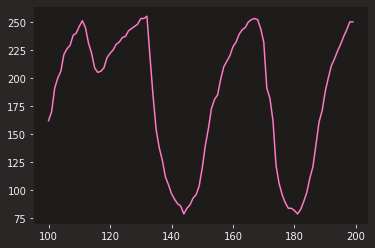

In [109]:
ham_tel.iloc[100:200].Speed.plot()

/home/rajaahdjey/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 0

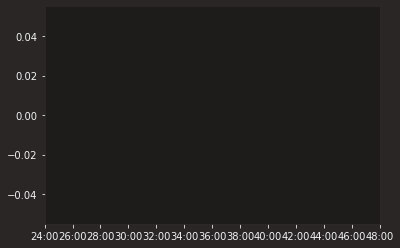

In [75]:
sns.lineplot(ver_tel.Time.iloc[100:104])

In [59]:
ver_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-03-19 15:58:45.931,10693,294,7,100,0,12,car,0 days 00:00:00.069000,0 days 01:13:45.002000,5.635000
1,2022-03-19 15:58:46.131,10474,295,8,100,0,12,car,0 days 00:00:00.269000,0 days 01:13:45.202000,22.023889
2,2022-03-19 15:58:46.291,10630,296,8,100,0,12,car,0 days 00:00:00.429000,0 days 01:13:45.362000,35.179444
3,2022-03-19 15:58:46.491,10727,298,8,100,0,12,car,0 days 00:00:00.629000,0 days 01:13:45.562000,51.735000
4,2022-03-19 15:58:46.731,10761,301,8,100,0,12,car,0 days 00:00:00.869000,0 days 01:13:45.802000,71.801667
...,...,...,...,...,...,...,...,...,...,...,...
331,2022-03-19 16:00:15.171,10946,276,7,100,0,12,car,0 days 00:01:29.309000,0 days 01:15:14.242000,5237.537222
332,2022-03-19 16:00:15.411,11187,278,7,100,0,12,car,0 days 00:01:29.549000,0 days 01:15:14.482000,5256.070556
333,2022-03-19 16:00:15.651,11253,283,7,100,0,12,car,0 days 00:01:29.789000,0 days 01:15:14.722000,5274.937222
334,2022-03-19 16:00:16.051,11460,286,7,100,0,12,car,0 days 00:01:30.189000,0 days 01:15:15.122000,5306.715000


In [19]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [20]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

RuntimeError: Can not put single artist in more than one figure

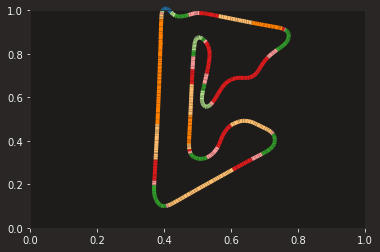

In [26]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {race.event['EventName']} {race.event.year}"
)

/tmp/ipykernel_11232/3174691261.py:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


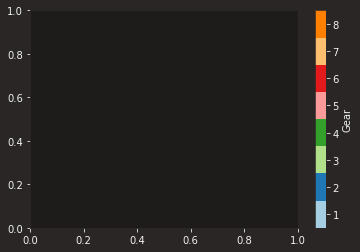

In [29]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()